# Credit Risk Problem
---

<img src="asset/dataset-cover.jpg">

## Case
---


*   Generates profit by giving loans to customers.
*   However, Condition might suffer loss if the customer did not pay the loan back (we called it as default customer)
*   To minimize the loss, the simple thing to do is to prevent bad applicants (who later become a default customer) get the loan

*   Create a classifier model to classify good or bad applicants from the given customer data to minimize the potential loss.




## Dataset
---

*   Dataset resource : [credit_risk_dataset](https://www.kaggle.com/datasets/laotse/credit-risk-dataset)

Description:

1. person_age	Age
2. person_income	Annual Income
3. person_home_ownership	Home ownership
4. person_emp_length	Employment length (in years)
5. loan_intent	Loan intent
6. loan_grade	Loan grade
7. loan_amnt	Loan amount
8. loan_int_rate	Interest rate
9. loan_status	Loan status (0 is non default 1 is default)
10. loan_percent_income	Percent income
11. cb_person_default_on_file	Historical default
12. cb_preson_cred_hist_length	Credit history length

## Modeling Task
---

### 1. Import Library
---

In [90]:
####################################################
# Import Numpy and Pandas library
####################################################
import pandas as pd
import numpy as np

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

### 2. Data Preparation
---

#### Load Data
---

In [91]:
def read_data(fname:pd.DataFrame)->pd.DataFrame:
  try:
    path = 'dataset/'
    data = pd.read_csv(path+fname)
    print(f"Data Shape raw \t\t\t: {data.shape}")

    return data
  except Exception as er:
    print(f"ERROR {er}")

In [92]:
data = read_data(fname='credit_risk_dataset.csv')
data.head()

Data Shape raw 			: (32581, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


#### Split Data
---



```
# Split Data:
Train Data      : 80%
Validation Data : 10%
Test Data       : 10%
```



In [93]:
def split_input_output(data:pd.DataFrame,target_col:str)->pd.DataFrame:
  try:
    y = data[target_col]
    X = data.drop(columns=[target_col])
    print(f"X shape :  {X.shape}")
    print(f"y shape :  {y.shape}")
    return X, y
  except Exception as er:
      print(f"ERROR {er}")

In [94]:
X, y = split_input_output(data=data,
                          target_col='loan_status')

X shape :  (32581, 11)
y shape :  (32581,)


In [95]:
def split_train_test(X:pd.DataFrame,y:pd.DataFrame,test_size:int, seed:float)->pd.DataFrame:
  try:
    X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=test_size, random_state=seed)
    print("")
    return X_train, X_test, y_train, y_test
  except Exception as err:
    print(f"Error : {err}")

In [96]:
# Split the data
# First, split the train & not train
X_train, X_not_train, y_train, y_not_train = split_train_test(X,y,test_size = 0.2,seed = 123) # WRITE YOUR CODE HERE, Use seed=123

# Then, split the valid & test
X_valid, X_test, y_valid, y_test = split_train_test(X_not_train,y_not_train,test_size = 0.5,seed = 123)# WRITE YOUR CODE HERE, Use seed=123

print(f"X train shape:{X_train.shape}")
print(f"y train shape:{y_train.shape}")
print("")
print(f"X X_valid shape :{X_valid.shape}")
print(f"y y_valid shape :{y_valid.shape}")
print("")
print(f"X_test shape :{X_test.shape}")
print(f"y_test shape :{y_test.shape}")



X train shape:(26064, 11)
y train shape:(26064,)

X X_valid shape :(3258, 11)
y y_valid shape :(3258,)

X_test shape :(3259, 11)
y_test shape :(3259,)


#### Exploratory Data Analysis (EDA)
---

In [97]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
29488,37,29000,MORTGAGE,8.0,DEBTCONSOLIDATION,B,7750,NaN,0.27,N,16
26554,29,105000,MORTGAGE,13.0,PERSONAL,C,5000,12.53,0.05,N,9
12235,26,32000,RENT,6.0,MEDICAL,A,12000,8.94,0.38,N,3
12554,25,82729,OWN,8.0,VENTURE,A,4800,6.17,0.06,N,3
53,23,97000,RENT,7.0,VENTURE,B,30000,10.65,0.31,N,2


In [98]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26064 entries, 29488 to 19966
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  26064 non-null  int64  
 1   person_income               26064 non-null  int64  
 2   person_home_ownership       26064 non-null  object 
 3   person_emp_length           25340 non-null  float64
 4   loan_intent                 26064 non-null  object 
 5   loan_grade                  26064 non-null  object 
 6   loan_amnt                   26064 non-null  int64  
 7   loan_int_rate               23569 non-null  float64
 8   loan_percent_income         26064 non-null  float64
 9   cb_person_default_on_file   26064 non-null  object 
 10  cb_person_cred_hist_length  26064 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 2.4+ MB


In [99]:
X_train.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,26064.000000,2.606400e+04,25340.000000,26064.000000,23569.000000,26064.000000,26064.000000
mean,27.724025,6.616768e+04,4.804183,9600.931361,11.031591,0.170525,5.799877
std,6.345674,6.534012e+04,4.176927,6334.401266,3.244323,0.106724,4.064317
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.840000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.900000e+04,7.000000,12250.000000,13.480000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


##### Check Distubution of Class

In [100]:
X_train_data = pd.concat([X_train,y_train], axis=1)

def class_dist(data,column,target):
  all_data = len(data)
  resp = len(data[data[column] == target])
  return (resp / all_data)*100

print(f"Class 1 : {round(class_dist(X_train_data,'loan_status',1),2)}%")
print(f"Class 0 : {round(class_dist(X_train_data,'loan_status',0),2)}%")

Class 1 : 22.0%
Class 0 : 78.0%




```
# Based on that data is imbalance with class 0 higher than class 1
```



##### Check Missing Values

In [101]:
X_train.isna().sum()/len(X_train)*100

,0
person_age,0.000000
person_income,0.000000
person_home_ownership,0.000000
person_emp_length,2.777778
loan_intent,0.000000
loan_grade,0.000000
loan_amnt,0.000000
loan_int_rate,9.572591
loan_percent_income,0.000000
cb_person_default_on_file,0.000000



Missing Values:
```
person_emp_length	: 2.78%
loan_int_rate	    : 9.57%
```



##### Explore Object Values

In [102]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
29488,MORTGAGE,DEBTCONSOLIDATION,B,N
26554,MORTGAGE,PERSONAL,C,N
12235,RENT,MEDICAL,A,N
12554,OWN,VENTURE,A,N
53,RENT,VENTURE,B,N


In [103]:
def count_values(data):
  for i, column in enumerate(data.columns):
    count = data[[column]].value_counts()
    print(count)
    print("==="*10)

In [104]:
count_values(X_train_cat)

person_home_ownership
RENT                     13213
MORTGAGE                 10638
OWN                       2118
OTHER                       95
Name: count, dtype: int64
loan_intent      
EDUCATION            5123
MEDICAL              4831
VENTURE              4605
PERSONAL             4411
DEBTCONSOLIDATION    4210
HOMEIMPROVEMENT      2884
Name: count, dtype: int64
loan_grade
A             8554
B             8379
C             5143
D             2960
E              780
F              192
G               56
Name: count, dtype: int64
cb_person_default_on_file
N                            21489
Y                             4575
Name: count, dtype: int64


In [105]:
def barchar_cat(data):
  columns_to_plot = data.columns
  # Calculate the number of rows needed for 2 columns
  n_cols = 2
  n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 8))
  axes = axes.flatten()

  for i, column in enumerate(columns_to_plot):
      value_counts = data[column].value_counts()
      axes[i].bar(value_counts.index, value_counts.values, color='skyblue')
      axes[i].set_title(f"Value Counts for {column}")
      axes[i].set_xlabel(column)
      axes[i].set_ylabel("Counts")

      # Add values on top of each bar
      for index, value in enumerate(value_counts.values):
          axes[i].text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)


  # Adjust layout
  plt.tight_layout()
  plt.show()

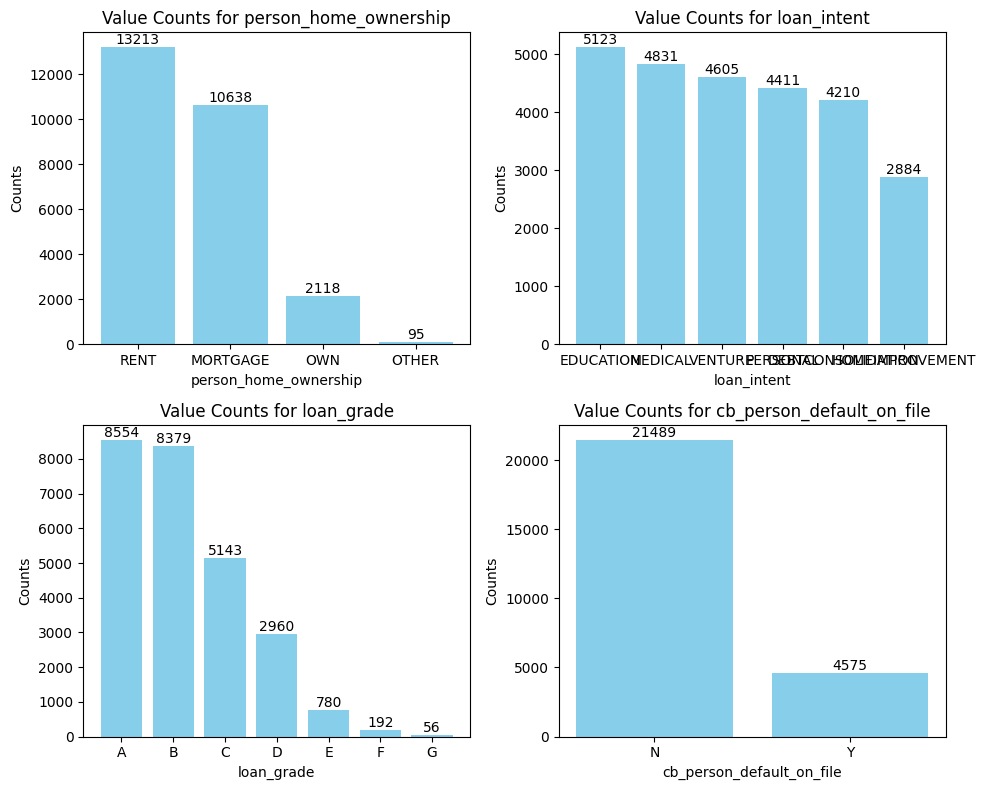

In [106]:
barchar_cat(X_train_cat)



```
# PERSON HOME OWNERSHIP
Observations: Most of the People taking a loan doesnt own their own house, only 2118 own house

# LOAN INTENT
Observation : Based on the results of the bar chart, the purpose of the loan is used for several purposes, such as education, medical, venture, personal debt consolidation, home improvement with a relatively similar distribution of loan costs.

# LOAN GRADE
Observations: Loan Grade A and B has the most positive values with total in percentage 8554 from total data
```

##### Explore Numeric Value

In [107]:
X_train_num = X_train.select_dtypes(include=np.number)
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
29488,37,29000,8.0,7750,NaN,0.27,16
26554,29,105000,13.0,5000,12.53,0.05,9
12235,26,32000,6.0,12000,8.94,0.38,3
12554,25,82729,8.0,4800,6.17,0.06,3
53,23,97000,7.0,30000,10.65,0.31,2


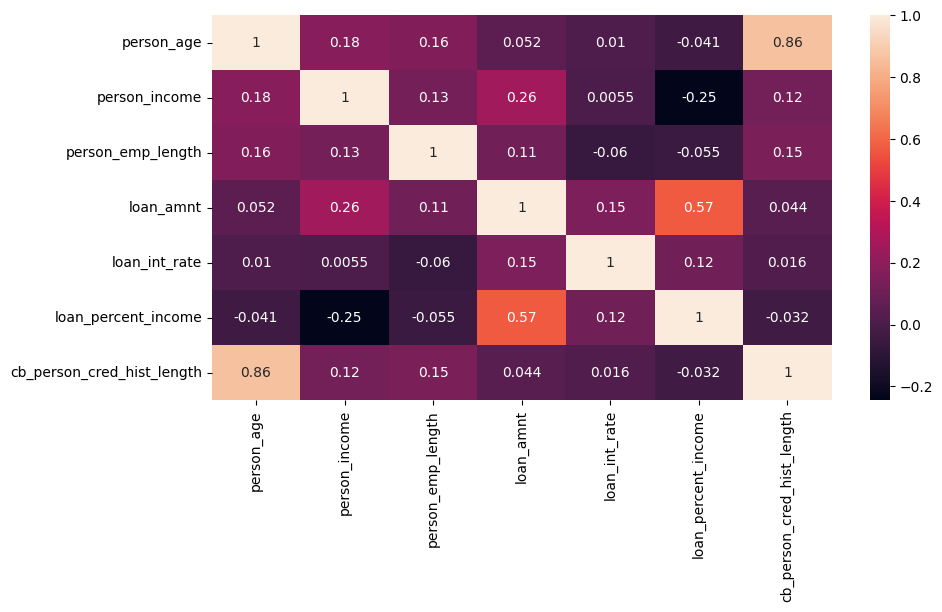

In [108]:
#Explore
plt.figure(figsize=(10,5))

sns.heatmap(X_train_num.corr(),annot = True)
plt.show()

###### Person Age Column

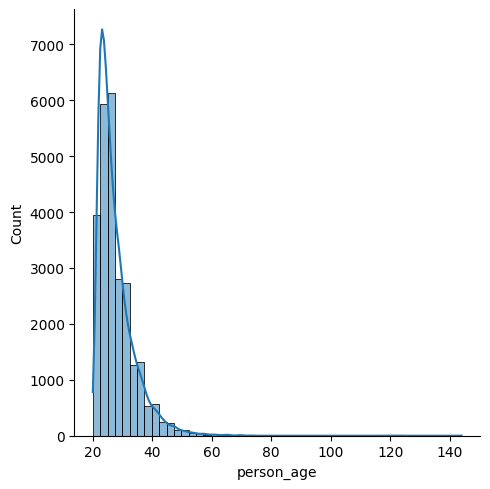

In [109]:
# Distribution
sns.displot(X_train_num['person_age'], kde=True, bins=50)



```
Observation : Most of people that taking a loan is age 20 to 60, but based on distribution the age of people is has more than 100 years
```



<Axes: >

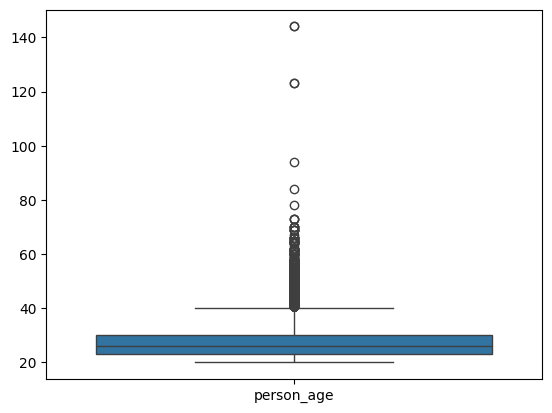

In [110]:
sns.boxplot(data=X_train_num[["person_age"]], orient="v")

###### Person Income Column

In [111]:
income_filtered = X_train_num[X_train_num['person_income'] > 800000]
print(f"Total : {len(income_filtered)}")

Total : 16


In [112]:
income_filtered

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
29120,40,1200000,1.0,10000,NaN,0.01,16
31922,47,1362000,9.0,6600,7.74,0.00,17
29119,36,1200000,16.0,10000,6.54,0.01,11
32037,36,828000,3.0,4200,NaN,0.01,13
32297,144,6000000,12.0,5000,12.73,0.00,25
32298,58,900000,18.0,19600,13.98,0.02,28
31924,44,1440000,7.0,6400,7.40,0.00,15
32546,60,1900000,5.0,1500,NaN,0.00,21
29345,42,889000,13.0,20000,NaN,0.02,17
32497,63,1782000,13.0,12025,14.27,0.01,30


Observation: The amount person income with max values = 6000000	is the person who has age 144

###### Person Emp Length Column

<Axes: ylabel='person_emp_length'>

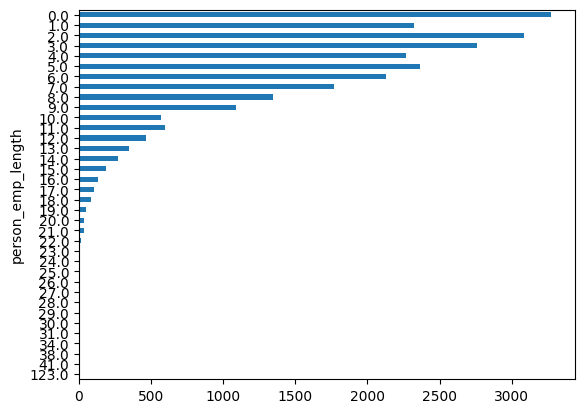

In [113]:
X_train_num.person_emp_length.value_counts().sort_index(ascending=False).plot(kind = 'barh')

<Axes: >

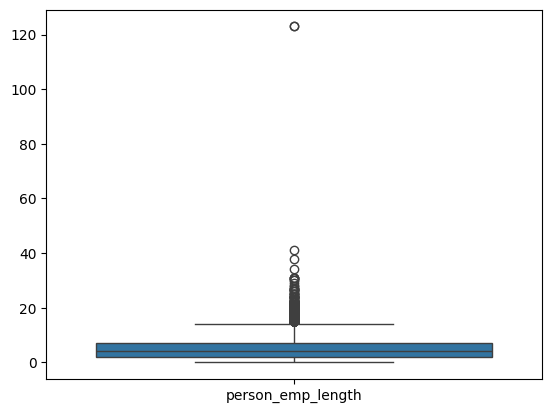

In [114]:
sns.boxplot(data=X_train_num[["person_emp_length"]], orient="v")

In [115]:
X_train_num[X_train_num['person_emp_length'] > 30]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
31867,46,180000,31.0,18000,9.91,0.10,11
32428,58,49000,34.0,7500,13.55,0.15,24
210,21,192000,123.0,20000,6.54,0.10,4
31866,47,178000,31.0,9000,10.99,0.05,17
0,22,59000,123.0,35000,16.02,0.59,3
32515,53,106000,38.0,20000,9.88,0.19,23
30914,48,70000,31.0,9000,14.54,0.13,17
32263,46,180000,31.0,18000,9.91,0.10,12
32355,78,48000,41.0,3000,7.51,0.06,25




```
# Based on the bar char we can see that the employee age length mostly is in range of 0 - 9 years, in 0 year indicate is the employee is not yet reach 1 year, assume is in less than 1 year ex: in montly , in preprocess data it will be convert to 1 year
```



In [116]:
X_train_num[X_train_num['person_emp_length'].isna()]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
21585,29,49000,NaN,4400,6.62,0.09,9
16901,25,62400,NaN,15000,17.58,0.24,3
4368,23,23136,NaN,4800,6.17,0.21,2
17371,24,43995,NaN,7400,13.99,0.17,3
27296,30,22800,NaN,7000,7.51,0.31,8
...,...,...,...,...,...,...,...
22586,35,56000,NaN,12000,NaN,0.21,8
28811,30,24000,NaN,7000,6.62,0.29,9
26587,35,106800,NaN,8000,6.92,0.07,9
29534,36,52500,NaN,2250,5.42,0.04,14


###### Loan Amount Column

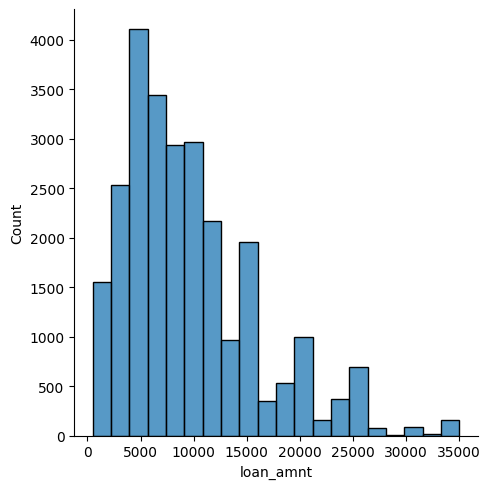

In [117]:
sns.displot(X_train_num, x="loan_amnt", bins=20)

<Axes: >

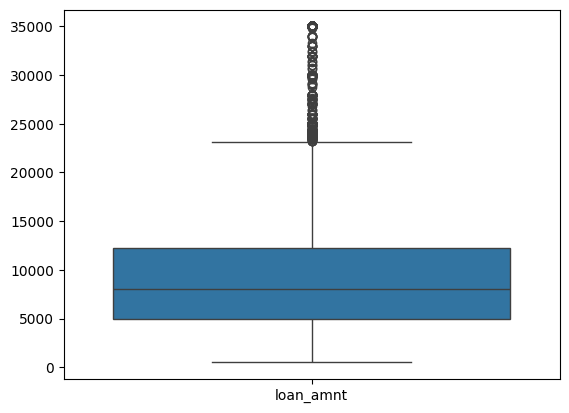

In [118]:
sns.boxplot(data=X_train_num[["loan_amnt"]], orient="v")



```
Observation: The amount of loan that is often taking by someone is in the avg around 75000
```



###### Loan Int Rate Column

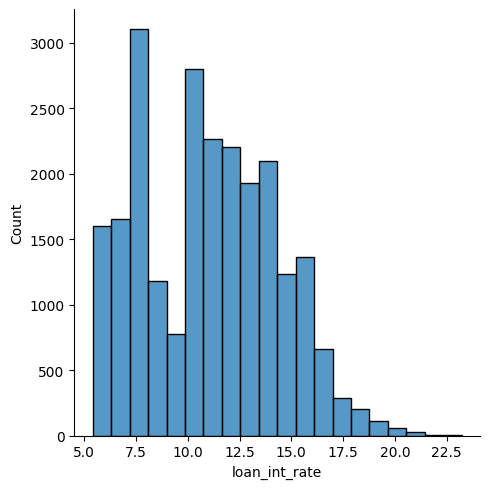

In [119]:
sns.displot(X_train_num, x="loan_int_rate", bins=20)

<Axes: >

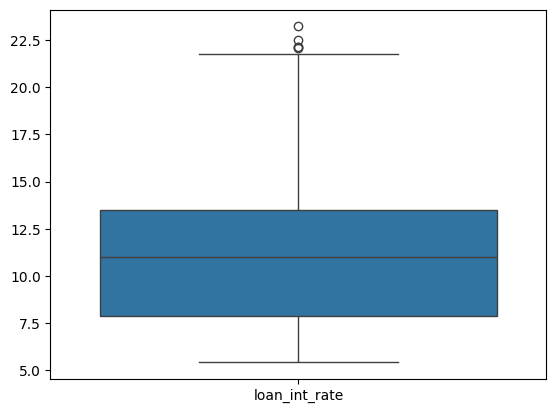

In [120]:
sns.boxplot(data=X_train_num[["loan_int_rate"]], orient="v")

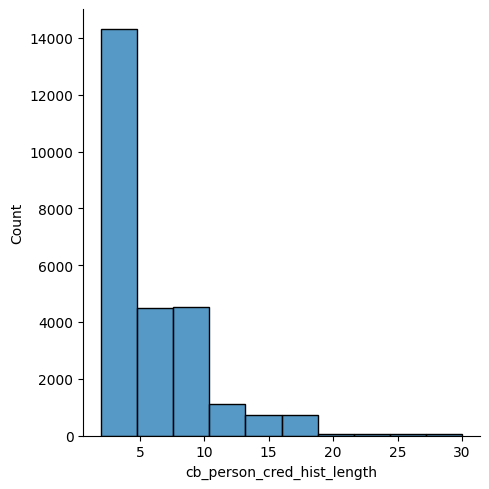

In [121]:
sns.displot(X_train_num, x="cb_person_cred_hist_length", bins=10)



```
# Obsercation : Mostly Length of the applicant’s credit history in year is around 2 - 18 year
```



#### Preprocessing Data
---

##### Numeric Values

###### Filter Column Age

In [122]:
X_train_num_prep = X_train_num[X_train_num['person_age'] <= 80]
X_train_num_prep.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
29488,37,29000,8.0,7750,NaN,0.27,16
26554,29,105000,13.0,5000,12.53,0.05,9
12235,26,32000,6.0,12000,8.94,0.38,3
12554,25,82729,8.0,4800,6.17,0.06,3
53,23,97000,7.0,30000,10.65,0.31,2


<Axes: >

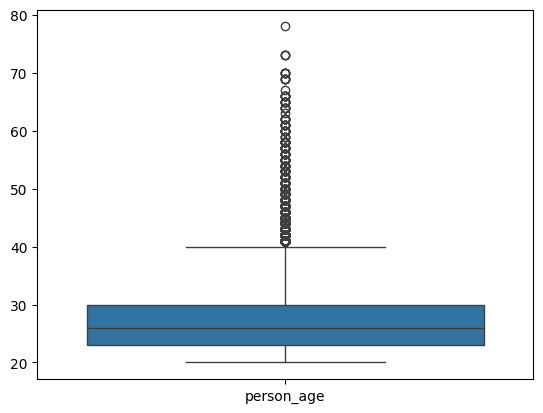

In [123]:
sns.boxplot(data=X_train_num_prep[["person_age"]], orient="v")

###### Person Emp Length Column

In [124]:
def convert_person_emp_length(data,column):
  data[column].replace(0, 1, inplace=True)
  return data

In [125]:
X_train_num_prep = convert_person_emp_length(X_train_num_prep,'person_emp_length')

<Axes: ylabel='person_emp_length'>

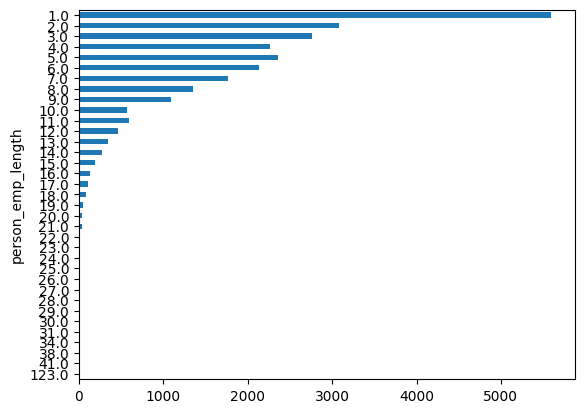

In [126]:
X_train_num_prep.person_emp_length.value_counts().sort_index(ascending=False).plot(kind = 'barh')

###### Handle Missing Values

In [127]:
X_train_num_prep.isna().sum()/len(X_train_num_prep)*100

,0
person_age,0.000000
person_income,0.000000
person_emp_length,2.778417
loan_amnt,0.000000
loan_int_rate,9.567120
loan_percent_income,0.000000
cb_person_cred_hist_length,0.000000


Person emp length

```
# Based on barchart to handle missing value in column person emp length and loan_int_rate will be inpute by median value
```



In [128]:
from sklearn.impute import SimpleImputer
def num_imputer_fit(X_train_num:pd.DataFrame):
  try:
    imputer = SimpleImputer(missing_values = np.nan,strategy = "median")
    return imputer
  except Exception as err:
    print(f"Error : {err}")


def num_imputer_transform(X_train_num:pd.DataFrame, imputer:SimpleImputer)->pd.DataFrame:
  try:
    # Fit imputer
    imputer.fit(X_train_num)

    # Transform
    imputed_data = imputer.transform(X_train_num)
    X_train_numerical_imputed = pd.DataFrame(imputed_data)
    X_train_numerical_imputed.columns = X_train_num.columns
    X_train_numerical_imputed.index = X_train_num.index
    return X_train_numerical_imputed
  except Exception as err:
    print(f"Error : {err}")

In [129]:
# Get the numerical imputer
num_imputer = num_imputer_fit(X_train_num = X_train_num_prep)# WRITE YOUR CODE HERE

# Transform the data
X_train_num_prep = num_imputer_transform(X_train_num = X_train_num_prep, imputer = num_imputer)# WRITE YOUR CODE HERE

In [130]:
X_train_num_prep.isna().sum()/len(X_train_num_prep)*100

,0
person_age,0.0
person_income,0.0
person_emp_length,0.0
loan_amnt,0.0
loan_int_rate,0.0
loan_percent_income,0.0
cb_person_cred_hist_length,0.0


##### Object Values

###### Ordinal Encoding



```
We use this categorical data encoding technique when the categorical feature is ordinal. In this case, retaining the order is important
```



In [131]:
def ordinal_encode(data):
  column = ['cb_person_default_on_file','loan_grade']
  dict_data = {
      'loan_grade' : {
          'A' : 1,
          'B' : 2,
          'C' : 3,
          'D' : 4,
          'E' : 5,
          'F' : 6,
          'G' : 7
      },
      'cb_person_default_on_file' :{
          'N' : 0,
          'Y' : 1
      }
  }
  new_df = data[column]
  for col in  column:
    if col in dict_data:
      map = dict_data[col]
      new_df[col] = new_df[col].map(lambda x: map[x])
  return new_df

In [132]:
X_train_cat_ord_prep = ordinal_encode(X_train_cat)
X_train_cat_ord_prep.head()

,cb_person_default_on_file,loan_grade
29488,0,2
26554,0,3
12235,0,1
12554,0,1
53,0,2


###### One Hot Encoding



```
We use this categorical data encoding technique when the features are nominal(do not have any order)
```



In [133]:
from sklearn.preprocessing import OneHotEncoder
def cat_encoder_fit(data:pd.DataFrame):
  try:
    data = data[['person_home_ownership','loan_intent']]
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(data)
    return encoder

  except Exception as err:
    print(f"Error : {err}")


def cat_encoder_transfrom(data:pd.DataFrame, encoder:OneHotEncoder)->pd.DataFrame:
  try:
    data = data[['person_home_ownership','loan_intent']]
    encoded_array = encoder.transform(data)
    columns = [name for name in encoder.get_feature_names_out(data.columns)]
    encoded_data = pd.DataFrame(encoded_array, columns=columns)

    encoded_data.index = data.index

    return encoded_data
  except Exception as err:
    print(f"Error : {err}")

In [134]:
# Perform categorical imputation
cat_encoder = cat_encoder_fit(X_train_cat)# WRITE YOUR CODE HERE

# Transform
X_train_cat_ohe_prep = cat_encoder_transfrom(X_train_cat,cat_encoder)# WRITE YOUR CODE HERE

In [135]:
X_train_cat_ohe_prep.head()

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
29488,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
26554,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12235,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
12554,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
53,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


Merge Ordinal and OHE encoding

In [136]:
def merge_data(data):
  new_data = pd.concat(data,axis=1, join='inner')
  return new_data

In [137]:
X_train_cat_prep = merge_data([X_train_cat_ohe_prep,X_train_cat_ord_prep])
X_train_cat_prep.head()

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file,loan_grade
29488,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2
26554,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3
12235,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1
12554,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
53,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,2


In [138]:
X_train_prep = merge_data([X_train_num_prep,X_train_cat_prep])

In [139]:
X_train_prep

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file,loan_grade
29488,37.0,29000.0,8.0,7750.0,10.99,0.27,16.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2
26554,29.0,105000.0,13.0,5000.0,12.53,0.05,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3
12235,26.0,32000.0,6.0,12000.0,8.94,0.38,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1
12554,25.0,82729.0,8.0,4800.0,6.17,0.06,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
53,23.0,97000.0,7.0,30000.0,10.65,0.31,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,28.0,81000.0,11.0,6000.0,6.17,0.07,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1
17730,22.0,26400.0,1.0,3500.0,15.27,0.13,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3
28030,33.0,71000.0,4.0,5300.0,11.49,0.07,9.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2
15725,26.0,91800.0,7.0,15450.0,10.91,0.14,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,3


##### Standardization

In [140]:
from sklearn.preprocessing import StandardScaler
def fit_scaler(data:pd.DataFrame)->pd.DataFrame:
  try:
    scaler = StandardScaler()
    scaler_data = scaler.fit(data)
    return scaler_data
  except Exception as err:
    print(f"Error : {err}")

def transform_scaler(data:pd.DataFrame,scaler:StandardScaler)->pd.DataFrame:
  try:
    scaled_data = scaler.transform(data)
    columns = [name for name in scaler.get_feature_names_out(data.columns)]
    new_df = pd.DataFrame(scaled_data, columns=columns)
    new_df.index = data.index
    return new_df
  except Exception as err:
    print(f"Error : {err}")

In [141]:
# Fit the scaler
scaler = fit_scaler(X_train_prep)# WRITE YOUR CODE HERE

# Transform the scaler
X_train_clean = transform_scaler(X_train_prep, scaler)# WRITE YOUR CODE HERE

In [142]:
# Validate (JUST RUN THE CODE)
X_train_clean.describe().round(4)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file,loan_grade
count,26058.0000,26058.0000,26058.0000,26058.0000,26058.0000,26058.0000,26058.0000,26058.0000,26058.0000,26058.0000,26058.0000,26058.0000,26058.0000,26058.0000,26058.0000,26058.0000,26058.0000,26058.0000,26058.0000
mean,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.2455,-1.1465,-0.9803,-1.4367,-1.8175,-1.5979,-0.9357,-0.8304,-0.0605,-0.2974,-1.0140,-0.4390,-0.4946,-0.3528,-0.4770,-0.4513,-0.4632,-0.4615,-1.0478
25%,-0.7604,-0.5097,-0.7295,-0.7263,-0.8225,-0.7546,-0.6893,-0.8304,-0.0605,-0.2974,-1.0140,-0.4390,-0.4946,-0.3528,-0.4770,-0.4513,-0.4632,-0.4615,-1.0478
50%,-0.2754,-0.2024,-0.2277,-0.2527,-0.0122,-0.1924,-0.4429,-0.8304,-0.0605,-0.2974,0.9862,-0.4390,-0.4946,-0.3528,-0.4770,-0.4513,-0.4632,-0.4615,-0.1933
75%,0.3714,0.2419,0.5250,0.4183,0.6749,0.5573,0.5425,1.2042,-0.0605,-0.2974,0.9862,-0.4390,-0.4946,-0.3528,-0.4770,-0.4513,-0.4632,-0.4615,0.6611
max,8.1325,36.5398,29.6276,4.0099,3.9517,6.1794,5.9623,1.2042,16.5316,3.3620,0.9862,2.2781,2.0220,2.8347,2.0964,2.2159,2.1587,2.1670,4.0789


##### Prep Function

In [143]:
def preprocess_data(data:pd.DataFrame)->pd.DataFrame:
    X_data_cat = data.select_dtypes(include=['object'])
    X_data_num = data.select_dtypes(include=np.number)

    # Numerical Data
    X_data_num = convert_person_emp_length(X_data_num,'person_emp_length')

    num_imputer = num_imputer_fit(X_train_num = X_data_num)

    X_data_num_prep = num_imputer_transform(X_train_num = X_data_num, imputer = num_imputer)


    # Categorical Data

    X_data_cat_ord_prep = ordinal_encode(X_data_cat)

    cat_encoder = cat_encoder_fit(X_data_cat)

    X_data_cat_ohe_prep = cat_encoder_transfrom(X_data_cat,cat_encoder)

    # Merge data

    X_data_cat_prep = merge_data([X_data_cat_ord_prep,X_data_cat_ohe_prep])

    X_data_prep = merge_data([X_data_num_prep,X_data_cat_prep])

    # return X_data_prep
    # Fit the scaler
    scaler = fit_scaler(X_data_prep)

    # Transform the scaler
    data_clean = transform_scaler(X_data_prep, scaler)
    print("")

    return data_clean

In [144]:
X_train_clean = preprocess_data(X_train)
X_train_clean

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,cb_person_default_on_file,loan_grade,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
29488,1.461807,-0.568845,0.775869,-0.292209,-0.012191,0.932095,2.509725,-0.461410,-0.193334,1.204195,-0.060483,-0.297404,-1.013987,2.278371,-0.494611,-0.352729,-0.476994,-0.451346,-0.463244
26554,0.201082,0.594322,2.030305,-0.726354,0.486984,-1.129342,0.787385,-0.461410,0.661178,1.204195,-0.060483,-0.297404,-1.013987,-0.438910,-0.494611,-0.352729,-0.476994,2.215596,-0.463244
12235,-0.271690,-0.522930,0.274095,0.378744,-0.676676,1.962814,-0.688906,-0.461410,-1.047846,-0.830431,-0.060483,-0.297404,0.986206,-0.438910,-0.494611,-0.352729,2.096463,-0.451346,-0.463244
12554,-0.429281,0.253468,0.775869,-0.757929,-1.574542,-1.035640,-0.688906,-0.461410,-1.047846,-0.830431,-0.060483,3.362432,-1.013987,-0.438910,-0.494611,-0.352729,-0.476994,-0.451346,2.158688
53,-0.744462,0.471883,0.524982,3.220424,-0.122398,1.306902,-0.934954,-0.461410,-0.193334,-0.830431,-0.060483,-0.297404,0.986206,-0.438910,-0.494611,-0.352729,-0.476994,-0.451346,2.158688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,0.043491,0.227006,1.528531,-0.568483,-1.574542,-0.941938,0.541337,-0.461410,-1.047846,1.204195,-0.060483,-0.297404,-1.013987,-0.438910,-0.494611,-0.352729,-0.476994,2.215596,-0.463244
17730,-0.902053,-0.608637,-0.980341,-0.963161,1.375126,-0.379728,-0.688906,-0.461410,0.661178,-0.830431,-0.060483,-0.297404,0.986206,-0.438910,-0.494611,-0.352729,-0.476994,2.215596,-0.463244
28030,0.831444,0.073958,-0.227679,-0.678993,0.149879,-0.941938,0.787385,-0.461410,-0.193334,1.204195,-0.060483,-0.297404,-1.013987,2.278371,-0.494611,-0.352729,-0.476994,-0.451346,-0.463244
15725,-0.271690,0.392298,0.524982,0.923399,-0.038122,-0.286027,-0.688906,2.167268,0.661178,-0.830431,-0.060483,-0.297404,0.986206,-0.438910,-0.494611,-0.352729,2.096463,-0.451346,-0.463244


### 3. Modeling
---

Based on the business problem this evaluation matric will be focus on Recall (Sensitivity), Focuses on minimizing false negatives and avoiding missing high-risk customers to prevent or minimize failure debt settlement


##### Baseline Model

In [145]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [146]:
baseline_model = DummyClassifier(strategy="stratified")
baseline_model.fit(X_train_clean, y_train)

DummyClassifier(strategy='stratified')

In [147]:
y_train_pred_baseline = baseline_model.predict(X_train_clean)
y_train_pred_baseline

array([0, 0, 0, ..., 0, 0, 0])

In [148]:
# Classification metrics
print("Classification Report:")
print(classification_report(y_train, y_train_pred_baseline))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78     20329
           1       0.22      0.22      0.22      5735

    accuracy                           0.66     26064
   macro avg       0.50      0.50      0.50     26064
weighted avg       0.66      0.66      0.66     26064



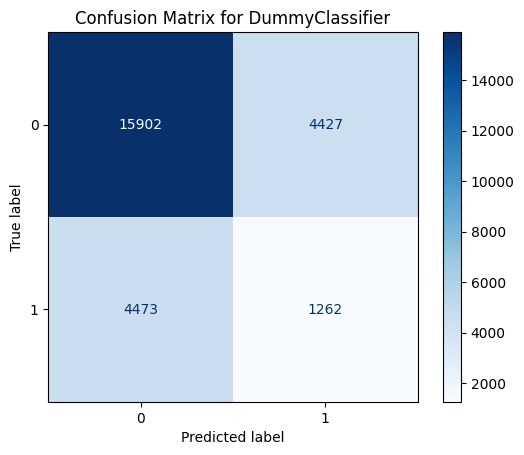

In [149]:
# Create and display confusion matrix
cm = confusion_matrix(y_train, y_train_pred_baseline)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseline_model.classes_)
disp.plot(cmap="Blues")
disp.ax_.set_title(f"Confusion Matrix for DummyClassifier")
plt.show()

Cross-validation

In [150]:
grid_search = GridSearchCV(baseline_model,param_grid={}, scoring='recall', cv=5)
grid_search.fit(X_train_clean, y_train)
best_model_baseline = grid_search.best_estimator_
best_model_baseline

DummyClassifier(strategy='stratified')

In [151]:
y_train_pred_baseline_cv = best_model_baseline.predict(X_train_clean)

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78     20329
           1       0.22      0.22      0.22      5735

    accuracy                           0.66     26064
   macro avg       0.50      0.50      0.50     26064
weighted avg       0.66      0.66      0.66     26064



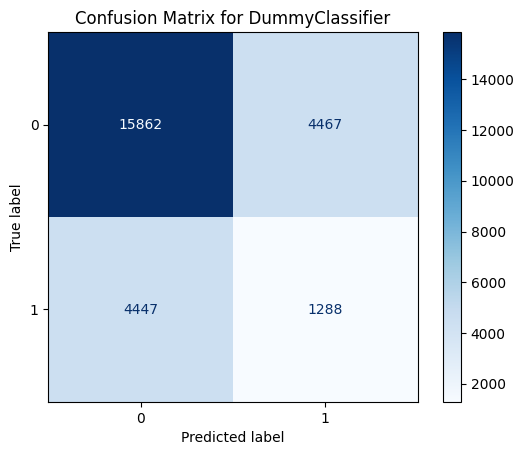

In [152]:
# Classification metrics
print("Classification Report:")
print(classification_report(y_train, y_train_pred_baseline_cv))
cm = confusion_matrix(y_train, y_train_pred_baseline_cv)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseline_model.classes_)
disp.plot(cmap="Blues")
disp.ax_.set_title(f"Confusion Matrix for DummyClassifier")
plt.show()

#### Model Experiment

###### Logistic Regression

- Data Train

In [153]:
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(LogisticRegression(random_state=42, solver='liblinear'), param_grid, scoring='recall', cv=5)
grid_search.fit(X_train_clean, y_train)
best_model_lr = grid_search.best_estimator_

In [154]:
best_model_lr

LogisticRegression(C=0.01, class_weight='balanced', random_state=42,
                   solver='liblinear')

In [155]:
y_train_pred_lr_cv = best_model_lr.predict(X_train_clean)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.79      0.85     20329
           1       0.51      0.79      0.62      5735

    accuracy                           0.79     26064
   macro avg       0.72      0.79      0.74     26064
weighted avg       0.84      0.79      0.80     26064



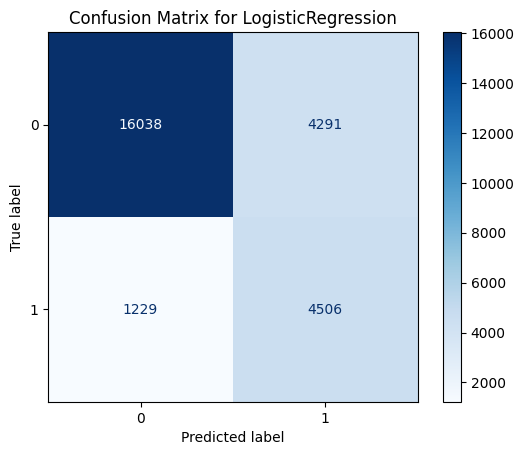

In [156]:
# Classification metrics
print("Classification Report:")
print(classification_report(y_train, y_train_pred_lr_cv))
cm = confusion_matrix(y_train, y_train_pred_lr_cv)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseline_model.classes_)
disp.plot(cmap="Blues")
disp.ax_.set_title(f"Confusion Matrix for LogisticRegression")
plt.show()

###### Random Forest Classifier

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', 'balanced_subsample']
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=20,
    scoring='recall',
    cv=5,
    random_state=42
)
random_search.fit(X_train_clean, y_train)

best_model_rfc = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 10, 'class_weight': 'balanced_subsample'}


In [165]:
y_train_pred_rfc_cv = best_model_rfc.predict(X_train_clean)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     20329
           1       0.90      0.79      0.84      5735

    accuracy                           0.93     26064
   macro avg       0.92      0.88      0.90     26064
weighted avg       0.93      0.93      0.93     26064



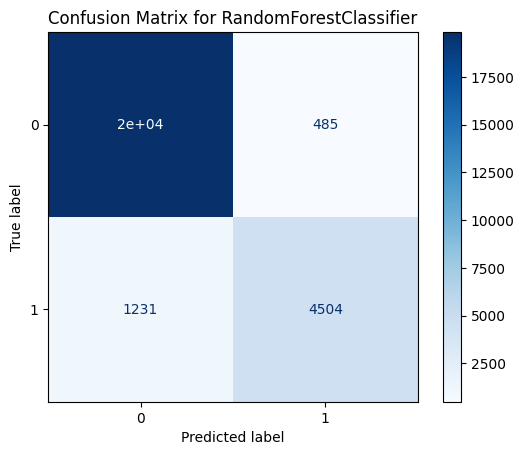

In [166]:
# Classification metrics
print("Classification Report:")
print(classification_report(y_train, y_train_pred_rfc_cv))
cm = confusion_matrix(y_train, y_train_pred_rfc_cv)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseline_model.classes_)
disp.plot(cmap="Blues")
disp.ax_.set_title(f"Confusion Matrix for RandomForestClassifier")
plt.show()

- Based on the result at experiment model, Logistic regression and Random Forest Classifier has Successfully exceeded the value limit of the specified base model

- We are already to hyperparameter model algorithm using cross-validation with k-fold = 5 and get the best parameter for every algorithm.


```
LogisticRegression :
# Best Parameters: {C=0.01, class_weight='balanced', random_state=42 ,solver='liblinear'}

Random Forest Classifier
# Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 10, 'class_weight': 'balanced_subsample'}
```



#### Best Model

**Random Forest Classifier**

- Train Data

In [175]:
params = {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 10, 'class_weight': 'balanced_subsample'}
model_rfc = RandomForestClassifier(**params)
model_rfc.fit(X_train_clean, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       min_samples_split=10, n_estimators=200)

In [182]:
y_train_pred_rfc = model_rfc.predict(X_train_clean)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     20329
           1       0.90      0.78      0.84      5735

    accuracy                           0.93     26064
   macro avg       0.92      0.88      0.90     26064
weighted avg       0.93      0.93      0.93     26064



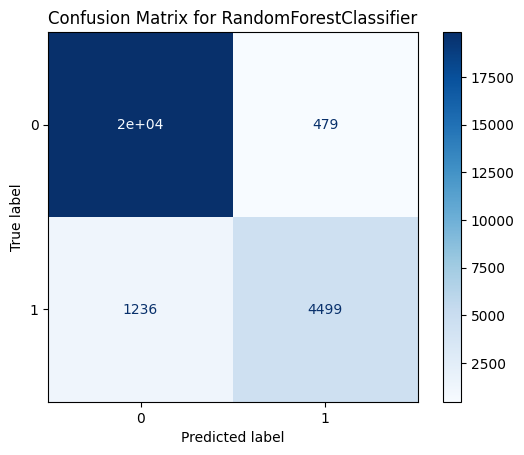

In [183]:
# Classification metrics
print("Classification Report:")
print(classification_report(y_train, y_train_pred_rfc))
cm = confusion_matrix(y_train, y_train_pred_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseline_model.classes_)
disp.plot(cmap="Blues")
disp.ax_.set_title(f"Confusion Matrix for RandomForestClassifier")
plt.show()

- Valid Data

In [181]:
X_valid_clean = preprocess_data(X_valid)
X_valid_clean.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,cb_person_default_on_file,loan_grade,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
17896,0.031230,4.830320,0.045494,2.505284,2.285363,-0.754753,0.529628,-0.477539,2.455502,-0.875678,-0.039205,-0.285785,1.022349,2.340328,-0.513109,-0.339101,-0.483346,-0.452146,-0.460493
15018,-0.276166,1.193922,0.838117,-0.883734,-1.233990,-1.320470,-0.697807,-0.477539,-1.026555,1.141973,-0.039205,-0.285785,-0.978139,2.340328,-0.513109,-0.339101,-0.483346,-0.452146,-0.460493
2392,-0.429865,-0.710858,-0.482921,0.891466,0.060897,2.828123,-0.452320,-0.477539,-0.156041,1.141973,-0.039205,-0.285785,-0.978139,-0.427290,-0.513109,-0.339101,-0.483346,2.211674,-0.460493
20889,0.799722,-0.451116,0.045494,-0.641661,0.021757,-0.377608,0.775115,-0.477539,-0.156041,1.141973,-0.039205,-0.285785,-0.978139,-0.427290,-0.513109,-0.339101,-0.483346,2.211674,-0.460493
4944,-0.429865,-0.650252,-0.747129,-0.722352,1.662382,-0.283322,-0.697807,2.094069,1.584988,-0.875678,-0.039205,-0.285785,1.022349,-0.427290,-0.513109,-0.339101,-0.483346,2.211674,-0.460493


In [184]:
y_valid_pred_rfc = model_rfc.predict(X_valid_clean)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2565
           1       0.65      0.74      0.69       693

    accuracy                           0.86      3258
   macro avg       0.79      0.82      0.80      3258
weighted avg       0.87      0.86      0.86      3258



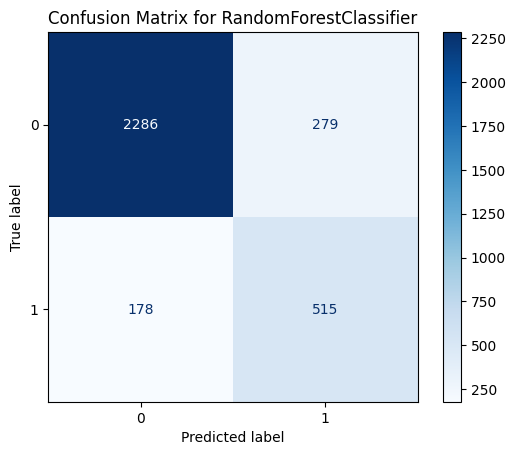

In [186]:
# Classification metrics
print("Classification Report:")
print(classification_report(y_valid, y_valid_pred_rfc))
cm = confusion_matrix(y_valid, y_valid_pred_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseline_model.classes_)
disp.plot(cmap="Blues")
disp.ax_.set_title(f"Confusion Matrix for RandomForestClassifier")
plt.show()

### 4. Model Evaluation
---

Let's perform to data test

In [187]:
X_test_clean = preprocess_data(X_test)
X_test_clean.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,cb_person_default_on_file,loan_grade,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
26736,0.683786,0.681292,2.905796,0.849235,-0.000666,-0.164783,-0.202132,-0.457958,-0.167428,1.158117,-0.046395,-0.269058,-1.006465,2.351821,-0.499616,-0.366005,-0.486151,-0.454030,-0.447625
31409,3.101120,0.551251,-1.004084,0.376544,1.029745,-0.350093,1.565302,-0.457958,1.570301,-0.863470,-0.046395,3.716670,-1.006465,-0.425202,-0.499616,2.732203,-0.486151,-0.454030,-0.447625
26414,-0.121992,0.485581,0.038551,1.637053,0.338456,0.483802,0.050359,-0.457958,-0.167428,1.158117,-0.046395,-0.269058,-1.006465,2.351821,-0.499616,-0.366005,-0.486151,-0.454030,-0.447625
32091,2.617653,-0.090282,-0.222108,0.061417,1.913421,-0.072128,2.322774,-0.457958,2.439165,-0.863470,-0.046395,-0.269058,0.993577,-0.425202,-0.499616,-0.366005,-0.486151,2.202496,-0.447625
32391,4.068054,0.464558,-1.004084,-0.726402,-0.802822,-0.998678,4.847680,-0.457958,-1.036292,-0.863470,-0.046395,-0.269058,0.993577,-0.425202,2.001536,-0.366005,-0.486151,-0.454030,-0.447625


In [188]:
y_test_pred_rfc = model_rfc.predict(X_test_clean)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      2579
           1       0.66      0.78      0.71       680

    accuracy                           0.87      3259
   macro avg       0.80      0.84      0.81      3259
weighted avg       0.88      0.87      0.87      3259



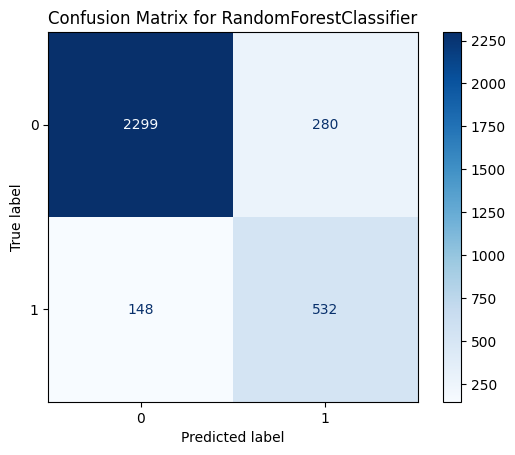

In [198]:
# Classification metrics
print("Classification Report:")
print(classification_report(y_test, y_test_pred_rfc))
cm_best_model = confusion_matrix(y_test, y_test_pred_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_model, display_labels=baseline_model.classes_)
disp.plot(cmap="Blues")
disp.ax_.set_title(f"Confusion Matrix for RandomForestClassifier")
plt.show()

Based on the result the model Random Forest Classifier is quite successful in determining the existing classification model

Baseline Model:

In [190]:
y_test_pred_baseline = baseline_model.predict(X_test_clean)

In [191]:
# Classification metrics
print("Classification Report:")
print(classification_report(y_test, y_test_pred_baseline))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      2579
           1       0.19      0.21      0.20       680

    accuracy                           0.65      3259
   macro avg       0.49      0.49      0.49      3259
weighted avg       0.66      0.65      0.66      3259



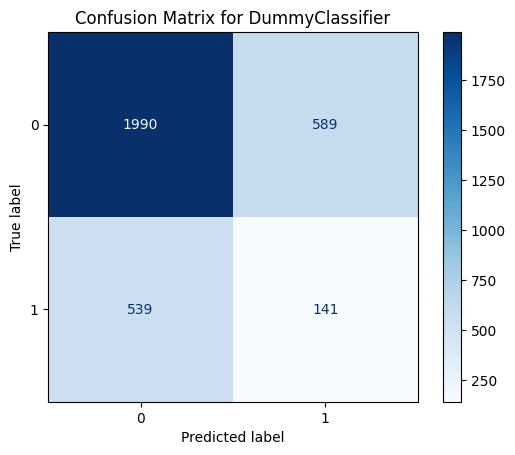

In [199]:
# Create and display confusion matrix
cm_baseline = confusion_matrix(y_test, y_test_pred_baseline)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_baseline, display_labels=baseline_model.classes_)
disp.plot(cmap="Blues")
disp.ax_.set_title(f"Confusion Matrix for DummyClassifier")
plt.show()

Based on the result the best model still more good from baseline model testing using data test

Compare Financial Impact:


In [ ]:
def financial_impact(cf_m):
  false_positive = cf_m[0][1]
  false_negative = cf_m[1][0]

  bad_as_good = 35_000_000
  good_as_bad = 10_000_000

  cal = (false_positive* bad_as_good) + (good_as_bad * false_negative)

  return cal

In [209]:
save_lost = financial_impact(cm_baseline) - financial_impact(cm_best_model)
print(f"From best model we can save Rp.{save_lost} from potential lost")

From best model we can save Rp.14725000000 from potential lost
